<a href="https://colab.research.google.com/github/MuhammadNaseem786/MuhammadNaseem/blob/main/Assigment_3_Class_GenAI_Face_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle tensorflow

# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

# Upload your Kaggle API key file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadnaseemismail","key":"816a0dcc3e0c597484f9b6f1300be98f"}'}

In [ ]:
# Configure Kaggle API
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

100%|██████████| 60.3M/60.3M [00:00<00:00, 209MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1


In [ ]:
# Download and unzip the dataset
!kaggle datasets download -d msambare/fer2013
!unzip -o fer2013.zip -d /content/fer2013_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/fer2013_data/train/sad/Training_65242339.jpg  
  inflating: /content/fer2013_data/train/sad/Training_65267116.jpg  
  inflating: /content/fer2013_data/train/sad/Training_65275626.jpg  
  inflating: /content/fer2013_data/train/sad/Training_6529266.jpg  
  inflating: /content/fer2013_data/train/sad/Training_65329617.jpg  
  inflating: /content/fer2013_data/train/sad/Training_65338712.jpg  
  inflating: /content/fer2013_data/train/sad/Training_65338797.jpg  
  inflating: /content/fer2013_data/train/sad/Training_65387162.jpg  
  inflating: /content/fer2013_data/train/sad/Training_65404494.jpg  
  inflating: /content/fer2013_data/train/sad/Training_65426218.jpg  
  inflating: /content/fer2013_data/train/sad/Training_65430136.jpg  
  inflating: /content/fer2013_data/train/sad/Training_65437377.jpg  
  inflating: /content/fer2013_data/train/sad/Training_6545735.jpg  
  inflating: /content/fer2013_data/train/sad/Training_

In [ ]:
# Load the dataset using pandas
data = pd.read_csv('/content/fer2013.csv')  # Assuming 'fer2013.csv' is the name of your dataset file

#Preprocess the data
# Extract features (pixels) and labels (emotions)
pixels = data['pixels']
emotions = data['emotion']

# Convert pixels to a NumPy array
# Fix: Pad pixel strings with spaces to ensure consistent length
max_len = max(len(pixel.split()) for pixel in pixels)  # Find maximum length of pixel strings
X = np.array([np.fromstring(pixel.ljust(max_len * 2 - 1, ' '), sep=' ', dtype=np.float32)
              for pixel in pixels])
X = X.reshape(-1, 48, 48, 1)  # Reshape to (num_samples, 48, 48, 1)

# Normalize pixel values to the range [0, 1]
X /= 255.0

# One-hot encode the labels
y = to_categorical(emotions, num_classes=7)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
#Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion categories
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Use early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stopping]
)


Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.2566 - loss: 1.8123 - val_accuracy: 0.3962 - val_loss: 1.5529
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4084 - loss: 1.5321 - val_accuracy: 0.4631 - val_loss: 1.3988
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4572 - loss: 1.4211 - val_accuracy: 0.4829 - val_loss: 1.3479
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4895 - loss: 1.3368 - val_accuracy: 0.5038 - val_loss: 1.2867
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5173 - loss: 1.2773 - val_accuracy: 0.5046 - val_loss: 1.2890
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5254 - loss: 1.2366 - val_accuracy: 0.5347 - val_loss: 1.2277
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5510 - loss: 1.1868 - val_accuracy: 0.5428 - val_loss: 1.2188
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5612 - loss: 1.1603 - val_accuracy: 

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5738 - loss: 1.1457
Test Accuracy: 57.56%
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.50      0.48       480
           1       1.00      0.12      0.21        60
           2       0.43      0.24      0.31       515
           3       0.79      0.81      0.80       883
           4       0.43      0.48      0.45       597
           5       0.66      0.77      0.71       397
           6       0.53      0.60      0.56       657

    accuracy                           0.58      3589
   macro avg       0.61      0.50      0.50      3589
weighted avg       0.58      0.58      0.56      3589



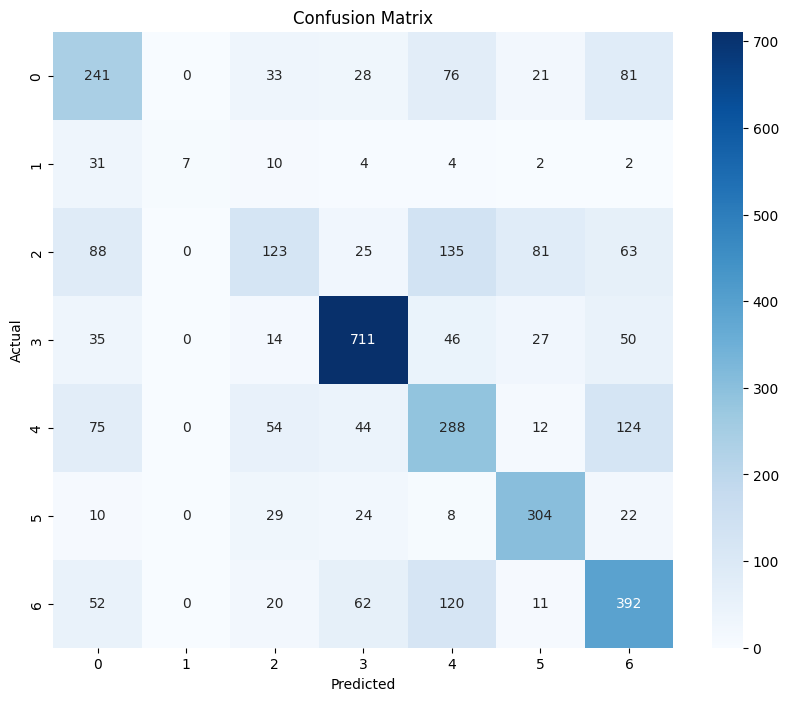

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(7)), yticklabels=list(range(7)))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


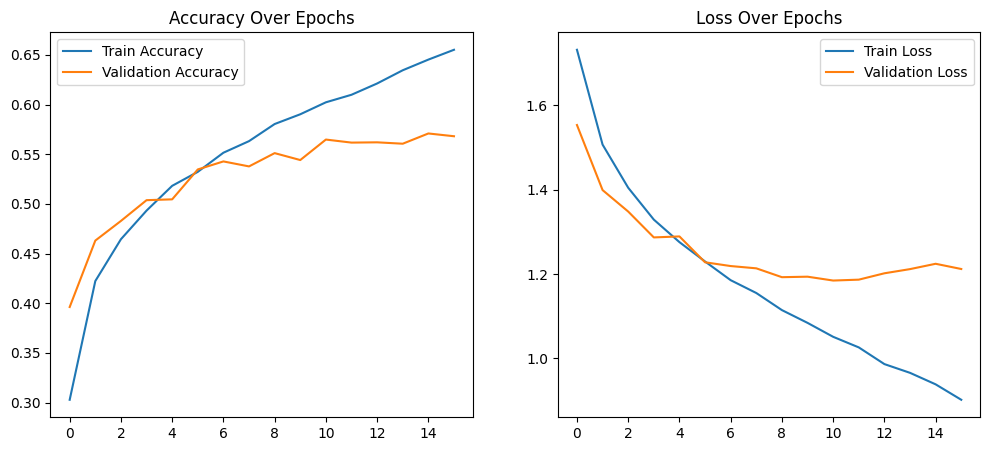

In [ ]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()




Insights:
Model Accuracy: Use the classification report and test accuracy to evaluate the model's performance.
Confusion Matrix: Analyze which emotions are often misclassified.
Improvements: If performance is suboptimal, consider using transfer learning (e.g., with pre-trained models like VGG16 or ResNet) or data augmentation.

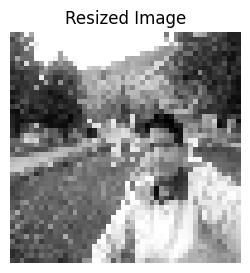

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv2.imread('/content/IMG_20220504_163639.jpg', cv2.IMREAD_GRAYSCALE)

# Resize the image to 48x48 pixels
img_resized = cv2.resize(img, (48, 48))

# Display the resized image using matplotlib
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap='gray')
plt.title("Resized Image")
plt.axis('off')
plt.show()

# Normalize and reshape the image for prediction (if needed)
img_normalized = img_resized.astype('float32') / 255.0
img_normalized = np.expand_dims(img_normalized, axis=-1)  # Add channel dimension
img_normalized = np.expand_dims(img_normalized, axis=0)     # Add batch dimension





In [ ]:
# Predict the emotion for the custom image
custom_pred = model.predict(img_resized)
custom_pred_class = np.argmax(custom_pred)
print("Predicted Emotion Class for custom image:", custom_pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Emotion Class for custom image: 3


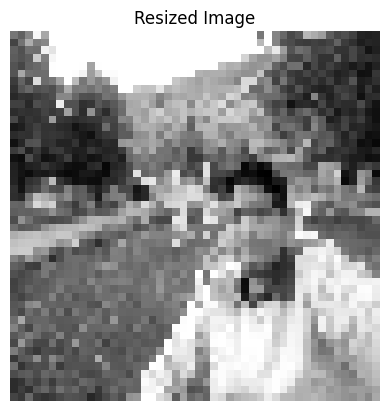

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Read image
img = cv2.imread('/content/IMG_20220504_163639.jpg', cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (48, 48))
# Display using matplotlib
plt.imshow(img_resized, cmap='gray')
plt.title("Resized Image")
plt.axis('off')
plt.show()


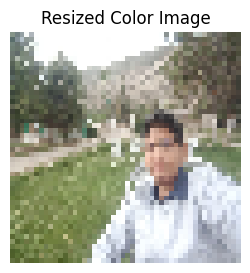

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image in color
img_color = cv2.imread('/content/IMG_20220504_163639.jpg', cv2.IMREAD_COLOR)

# Step 2: Convert the image from BGR to RGB (OpenCV loads in BGR)
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Step 3: Resize the image with a high-quality interpolation method
img_resized = cv2.resize(img_rgb, (48, 48), interpolation=cv2.INTER_CUBIC)

# Step 4: Display the resized image using Matplotlib
plt.figure(figsize=(3, 3))
plt.imshow(img_resized)
plt.title("Resized Color Image")
plt.axis('off')
plt.show()


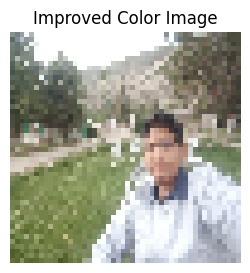

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Emotion: Happy


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Read the image in color and convert from BGR to RGB.
img_color = cv2.imread('/content/IMG_20220504_163639.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# 2. Resize the image to 48x48 using a high-quality interpolation method.
img_resized = cv2.resize(img_rgb, (48, 48), interpolation=cv2.INTER_LANCZOS4)

# 3. Display the improved color image.
plt.figure(figsize=(3,3))
plt.imshow(img_resized)
plt.title("Improved Color Image")
plt.axis('off')
plt.show()

# 4. Convert the resized color image to grayscale if your model expects grayscale input.
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)

# 5. Preprocess the grayscale image for model prediction.
img_preprocessed = img_gray.astype('float32') / 255.0
img_preprocessed = np.expand_dims(img_preprocessed, axis=-1)  # Add channel dimension (48,48,1)
img_preprocessed = np.expand_dims(img_preprocessed, axis=0)     # Add batch dimension (1,48,48,1)

# 6. Predict the mood/emotion using your trained model.
#    (Assuming your model is already loaded and trained as 'model')
prediction = model.predict(img_preprocessed)
predicted_class = np.argmax(prediction)

# 7. Map the predicted class to its corresponding emotion label.
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
print("Predicted Emotion:", emotion_dict[predicted_class])
